In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Estudo com diferentes algoritmos de machine learning em três bases dferentes

<p style="color:blue">Base de dados: Credit</p>
<p style="color:red">Base de dados: CENSUS</p>
<p style="color:green">Base de dados: Risco de credito</p>


In [2]:
# Base de dados Credit
base_credit = pd.read_csv('base_credit.csv')
base_credit.head()

,Unnamed: 0,clientid,income,age,loan,default
0,0,1,66155.925095,59.017015,8106.532131,0
1,1,2,34415.153966,48.117153,6564.745018,0
2,2,3,57317.170063,63.108049,8020.953296,0
3,3,4,42709.534201,45.751972,6103.642260,0
4,4,5,66952.688845,18.584336,8770.099235,1


In [3]:
# Base de dados Census
base_census = pd.read_csv('Bases de dados/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Base de dados Risco de Credito
base_risco_credito = pd.read_csv('Bases de dados/risco_credito.csv')
base_risco_credito.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


# Árvore de decisão

In [5]:
from sklearn.tree import DecisionTreeClassifier

## Base risco de crédito

In [6]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)


In [7]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito,y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [8]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

[Text(279.0, 489.24, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(111.6, 380.52000000000004, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(55.8, 271.8, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(167.39999999999998, 271.8, 'divida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(111.6, 163.08000000000004, 'história <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(55.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(223.2, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(446.4, 380.52000000000004, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(390.59999999999997, 271.8, 'história <= 

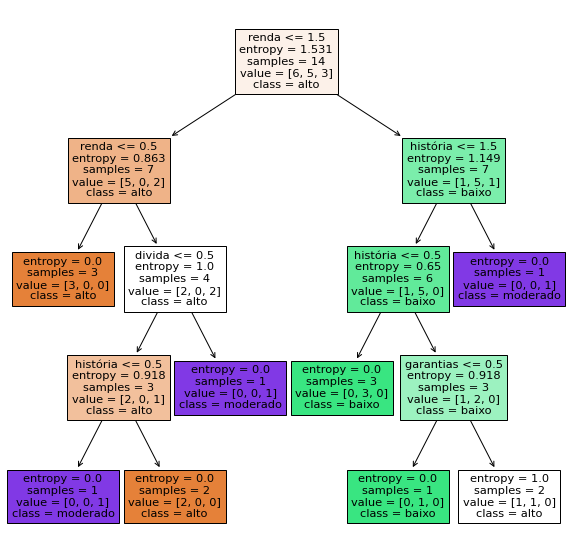

In [9]:
from sklearn import tree
previsores = ['história', 'divida','garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
tree.plot_tree(arvore_risco_credito,feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)

In [10]:
# historia boa(0), divida alta(0), garantias nenhuma(1), renda > 35(2)
# historia ruim(2), divida alta(0), garantias adequadas(0), renda < 35(0)   
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base credit data

In [11]:
with open('credit.pkl', 'rb') as f: #Chama a variavel salva com todas as configurações do algoritmo 
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [12]:
arvore_credit = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
previsoes = arvore_credit.predict(x_credit_teste) 

In [14]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

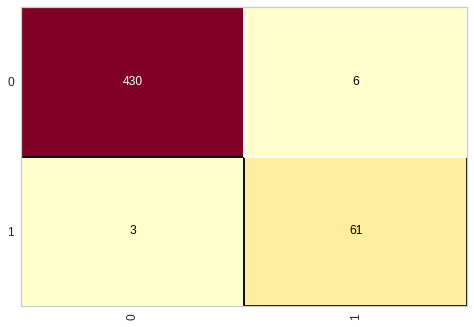

In [15]:
 from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [16]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



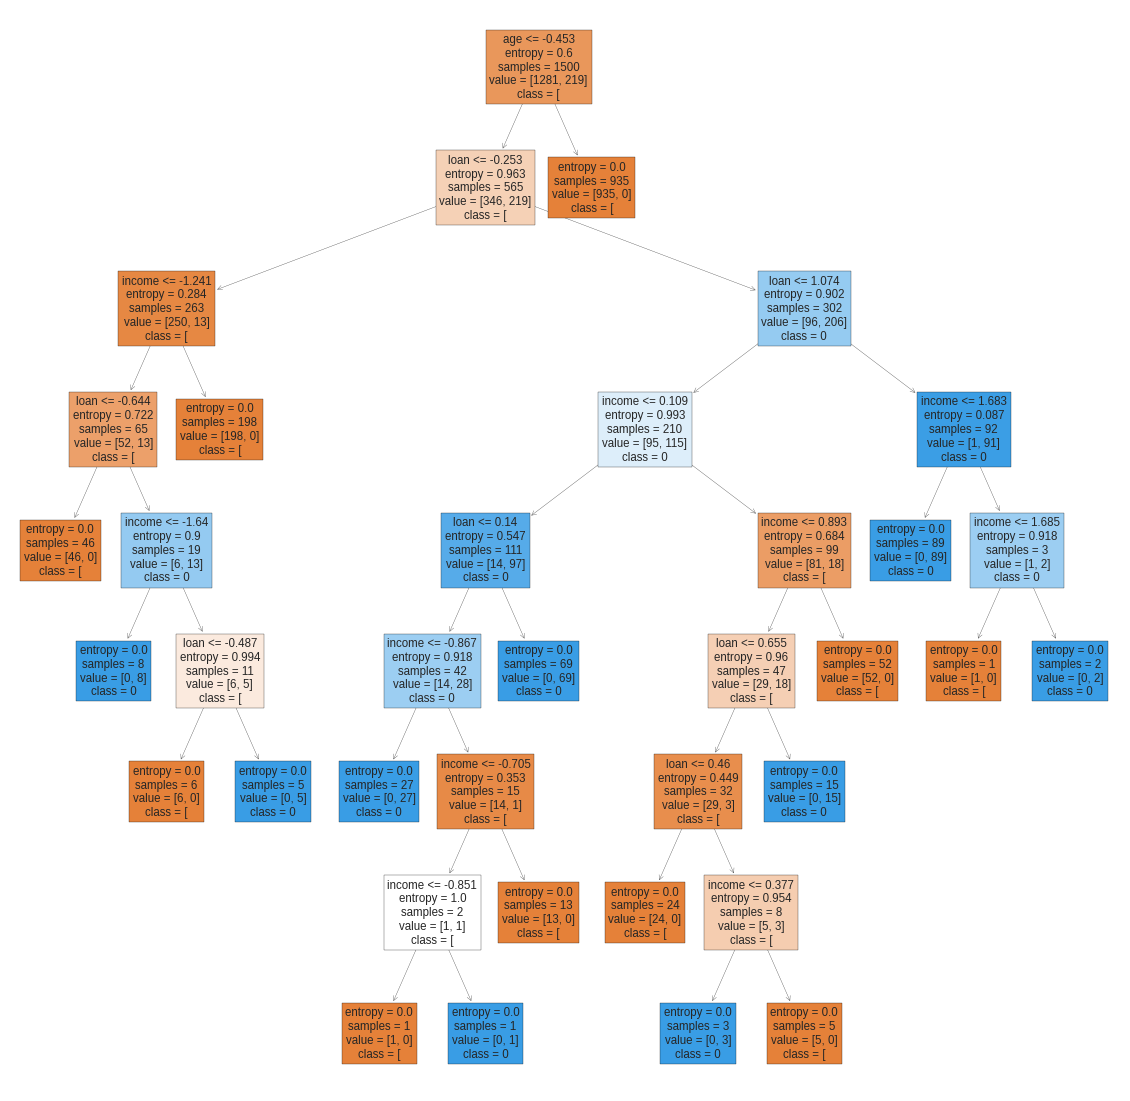

In [17]:
from sklearn import tree
previsores = ['income', 'age','loan']
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20,20))
tree.plot_tree(arvore_credit,feature_names=previsores, class_names=str(arvore_credit.classes_), filled=True)
fig.savefig('arvore_credit.png')

In [18]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



## Base census

In [19]:
with open('census.pkl', 'rb') as f:
    x_census_treinamento,x_census_teste,y_census_treinamento,y_census_teste = pickle.load(f)

In [20]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento,y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
previsoes = arvore_census.predict(x_census_teste)

In [22]:
accuracy_score(y_census_teste,previsoes)

0.8104401228249745

0.8104401228249745

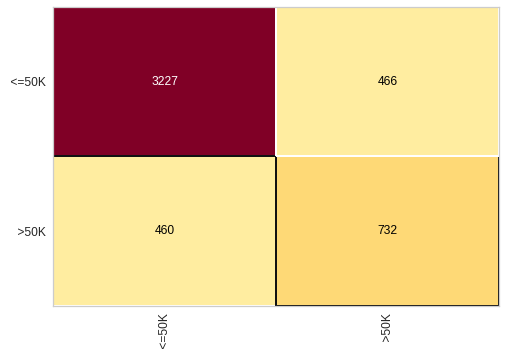

In [23]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [24]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

